<a href="https://colab.research.google.com/github/aidanvu1992/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Anh_Vu_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
voting_url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

In [0]:
house_votes = pd.read_csv(voting_url, header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

In [0]:
house_votes = house_votes.replace({'?':np.NaN, 'y':1, 'n':0})

In [5]:
house_votes.dtypes

party                    object
handicapped-infants     float64
water-project           float64
budget                  float64
physician-fee-freeze    float64
el-salvador-aid         float64
religious-groups        float64
anti-satellite-ban      float64
aid-to-contras          float64
mx-missile              float64
immigration             float64
synfuels                float64
education               float64
right-to-sue            float64
crime                   float64
duty-free               float64
south-africa            float64
dtype: object

In [0]:
republican = house_votes[house_votes['party'] == 'republican']
democrat = house_votes[house_votes['party'] == 'democrat']

In [0]:
def get_mean(x):
  return f'republican is {republican[x].mean()}', f'democrat is {democrat[x].mean()}'

In [0]:
def sample_rep(a):
  sample_size = 100
  return republican[a].sample(sample_size)
def sample_dem(b):
  sample_size = 100
  return democrat[b].sample(sample_size)

In [0]:
def sample_mean_std(a):
  sample_rep_mean = sample_rep(a).mean()
  sample_rep_std = np.std(sample_rep(a), ddof = 1)
  sample_dem_mean = sample_dem(a).mean()
  sample_dem_std = np.std(sample_dem(a), ddof = 1)
  return f'Republican: mean is {sample_rep_mean}, std is {sample_rep_std}', f'Democrat: mean is {sample_dem_mean}, std is {sample_dem_std}'

In [10]:
republican.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [11]:
democrat.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


# Issues with more republican support

In [12]:
get_mean('physician-fee-freeze')

('republican is 0.9878787878787879', 'democrat is 0.05405405405405406')

In [13]:
scs.ttest_ind(republican['physician-fee-freeze'], democrat['physician-fee-freeze'], nan_policy = 'omit')

Ttest_indResult(statistic=49.36708157301406, pvalue=1.994262314074344e-177)

In [0]:
def conf_intv(data, confidence = 0.95):
  data = data[~np.isnan(data)]
  mean = np.mean(data)
  n = len(data)
  stderr = scs.sem(data)
  t = scs.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval)

In [15]:
sample_rep('physician-fee-freeze').head()

339    1.0
82     1.0
403    1.0
123    1.0
229    1.0
Name: physician-fee-freeze, dtype: float64

In [16]:
sample_dem('physician-fee-freeze').head()

4      0.0
109    0.0
170    0.0
288    0.0
162    0.0
Name: physician-fee-freeze, dtype: float64

In [17]:
sample_mean_std('physician-fee-freeze')

('Republican: mean is 0.9897959183673469, std is 0.10101525445522108',
 'Democrat: mean is 0.08333333333333333, std is 0.14284180084530065')

In [18]:
conf_intv(sample_rep('physician-fee-freeze'))

(0.979381443298969, 0.9505924467066054, 1.0081704398913327)

In [19]:
conf_intv(sample_dem('physician-fee-freeze'))

(0.050505050505050504, 0.006607056250056725, 0.09440304476004428)

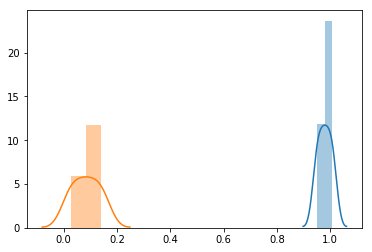

In [20]:
x = conf_intv(sample_rep('physician-fee-freeze'))
y = conf_intv(sample_dem('physician-fee-freeze'))
ax = plt.subplots()
for plot in [x, y]:
  sns.distplot(plot)

# Issues with more democrat support

In [21]:
get_mean('budget')

('republican is 0.13414634146341464', 'democrat is 0.8884615384615384')

In [22]:
scs.ttest_ind(republican['budget'], democrat['budget'], nan_policy = 'omit')

Ttest_indResult(statistic=-23.21277691701378, pvalue=2.0703402795404463e-77)

In [23]:
sample_rep('budget').head()

71     1.0
379    0.0
156    0.0
410    0.0
123    0.0
Name: budget, dtype: float64

In [24]:
sample_dem('budget').head()

269    1.0
323    1.0
216    1.0
367    1.0
115    1.0
Name: budget, dtype: float64

In [25]:
sample_mean_std('budget')

('Republican: mean is 0.14583333333333334, std is 0.3424442162412928',
 'Democrat: mean is 0.8854166666666666, std is 0.33245498310218435')

In [26]:
conf_intv(sample_rep('budget'))

(0.1326530612244898, 0.06429824194574703, 0.2010078805032326)

In [27]:
conf_intv(sample_dem('budget'))

(0.9292929292929293, 0.8779076546543678, 0.9806782039314907)

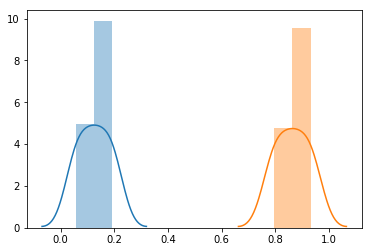

In [28]:
n = conf_intv(sample_rep('budget'))
m = conf_intv(sample_dem('budget'))
ax = plt.subplots()
for plot in [n, m]:
  sns.distplot(plot)

# Chi-squared Test 'by hand'


In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
df.describe(exclude = 'number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [31]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [32]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [0]:
race_salary = pd.crosstab(df.salary, df.race, margins=True)

In [42]:
race_salary

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
salary,,,,,,
<=50K,275,763,2737,246,20699,24720
>50K,36,276,387,25,7117,7841
All,311,1039,3124,271,27816,32561


In [51]:
row_sums = race_salary.iloc[0:2, 5].values
col_sums = race_salary.iloc[2, 0:5].values
print(row_sums)
print(col_sums)

[24720  7841]
[  311  1039  3124   271 27816]


In [0]:
total = race_salary.loc['All', 'All']

In [52]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
                        
expected = np.array(expected)
print(expected.shape)
print(expected)


(2, 5)
[[  236.10822763   788.79886981  2371.71094254   205.74060993
  21117.64135008]
 [   74.89177237   250.20113019   752.28905746    65.25939007
   6698.35864992]]


In [53]:
observed = pd.crosstab(df.salary, df.race).values
print(observed.shape)
observed

(2, 5)


array([[  275,   763,  2737,   246, 20699],
       [   36,   276,   387,    25,  7117]])

In [54]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

330.9204310085741

#Chi-square test by Scipy

In [56]:
chi_squared, p_value, dof, expected = scs.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

330.9204310085741 2.305960610160958e-70 4 [[  236.10822763   788.79886981  2371.71094254   205.74060993
  21117.64135008]
 [   74.89177237   250.20113019   752.28905746    65.25939007
   6698.35864992]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)